# **1. Import Required Libraries**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load Data**

In [87]:
df = pd.read_csv('career_pred.csv')
df.head()

,Academic percentage in Operating Systems,Percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Academic percentage in Operating Systems  20000 non-null  int64 
 1   Percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical Quotient rating                   2000

In [89]:
del df['Salary Range Expected'] 
del df['Salary/work'] 
del df['Academic percentage in Operating Systems'] 
del df['Percentage in Algorithms'] 
del df['Percentage in Programming Concepts'] 
del df['Percentage in Software Engineering'] 
del df['Percentage in Computer Networks']
del df['Percentage in Electronics Subjects']
del df['Percentage in Computer Architecture'] 
del df['Percentage in Mathematics']
del df['In a Realtionship?']

In [90]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 20000 professionals and 28 features


# **3. Data Preprocessing**

In [91]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Percentage in Communication skills', 'Hours working per day',
       'Logical Quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Gentle or Tuff behaviour?',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [92]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Percentage in Communication skills', 'Hours working per day', 'Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


**(1) Checking missing values**

In [93]:
df.isnull().sum(axis=0)

Percentage in Communication skills     0
Hours working per day                  0
Logical Quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
can work long time before system?      0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
talenttests taken?                     0
olympiads                              0
reading and writing skills             0
memory capability score                0
Interested subjects                    0
interested career area                 0
Job/Higher Studies?                    0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
interested in games                    0
Interested Type of Books               0
Gentle or Tuff behaviour?              0
Management or Technical                0
hard/smart worke

**Observation:** *no missing values*

**(2) Checking Distinct Values for Categorical Features**

In [94]:
categorical_col = df[['can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'interested in games', 'Interested Type of Books', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']]
for i in categorical_col: 
  print(df[i].value_counts())

can work long time before system?
yes    10020
no      9980
Name: count, dtype: int64
self-learning capability?
yes    10102
no      9898
Name: count, dtype: int64
Extra-courses did
no     10049
yes     9951
Name: count, dtype: int64
certifications
r programming           2275
machine learning        2255
shell programming       2252
information security    2250
full stack              2239
hadoop                  2210
python                  2198
app development         2165
distro making           2156
Name: count, dtype: int64
workshops
web technologies     2586
data science         2551
game development     2522
database security    2517
system designing     2516
hacking              2473
testing              2444
cloud computing      2391
Name: count, dtype: int64
talenttests taken?
yes    10047
no      9953
Name: count, dtype: int64
olympiads
yes    10079
no      9921
Name: count, dtype: int64
reading and writing skills
excellent    6696
poor         6683
medium       6621
Name: 

**Observations:** *The categorical features with yes or no can be made numerical easily using binary encoding.*


**(3) Checking Data Balancing for Classification**

<Axes: xlabel='Suggested Job Role', ylabel='count'>

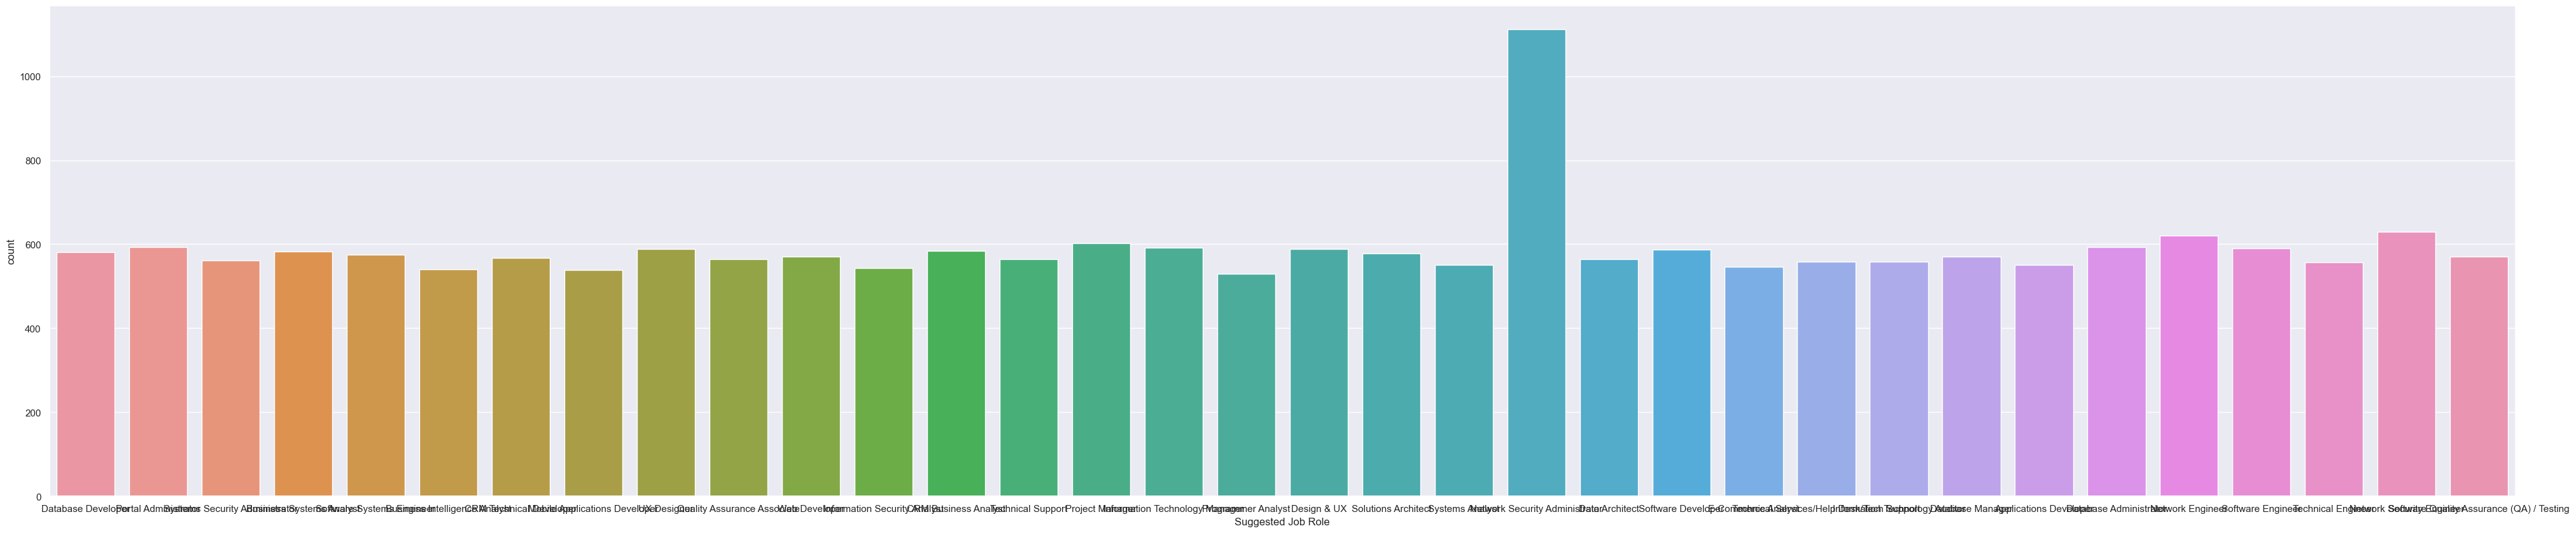

In [95]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

**Observation:** *Got Imbalanced data*

(3.1) Performing Random Over-Sampling

In [96]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('Suggested Job Role', axis=1) 
Y = df['Suggested Job Role'] 

# Resample the minority class using RandomOverSampler 
oversample = RandomOverSampler() 
X_resampled, y_resampled = oversample.fit_resample(X, Y) 

df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1) 
df_balanced.columns = df.columns  

df_balanced.to_csv('balanced_Data.csv', index=False) 

In [97]:
df_balanced.head()

,Percentage in Communication skills,Hours working per day,Logical Quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,...,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Gentle or Tuff behaviour?,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,61,9,4,0,4,8,yes,yes,yes,shell programming,...,Web Services,no,no,Prayer books,stubborn,Management,hard worker,yes,no,Database Developer
1,91,12,7,1,2,3,yes,no,yes,machine learning,...,SAaS services,yes,yes,Childrens,gentle,Technical,hard worker,no,yes,Portal Administrator
2,94,11,1,4,1,3,yes,no,yes,app development,...,Sales and Marketing,yes,yes,Travel,stubborn,Management,hard worker,no,yes,Portal Administrator
3,69,7,1,1,2,5,no,yes,no,python,...,Testing and Maintainance Services,no,no,Romance,gentle,Management,smart worker,yes,yes,Systems Security Administrator
4,73,4,5,4,6,3,no,no,no,app development,...,product development,no,yes,Cookbooks,stubborn,Management,hard worker,yes,yes,Business Systems Analyst


**(3.2) Again Checking Data Balancing for Classification**

<Axes: xlabel='Suggested Job Role', ylabel='count'>

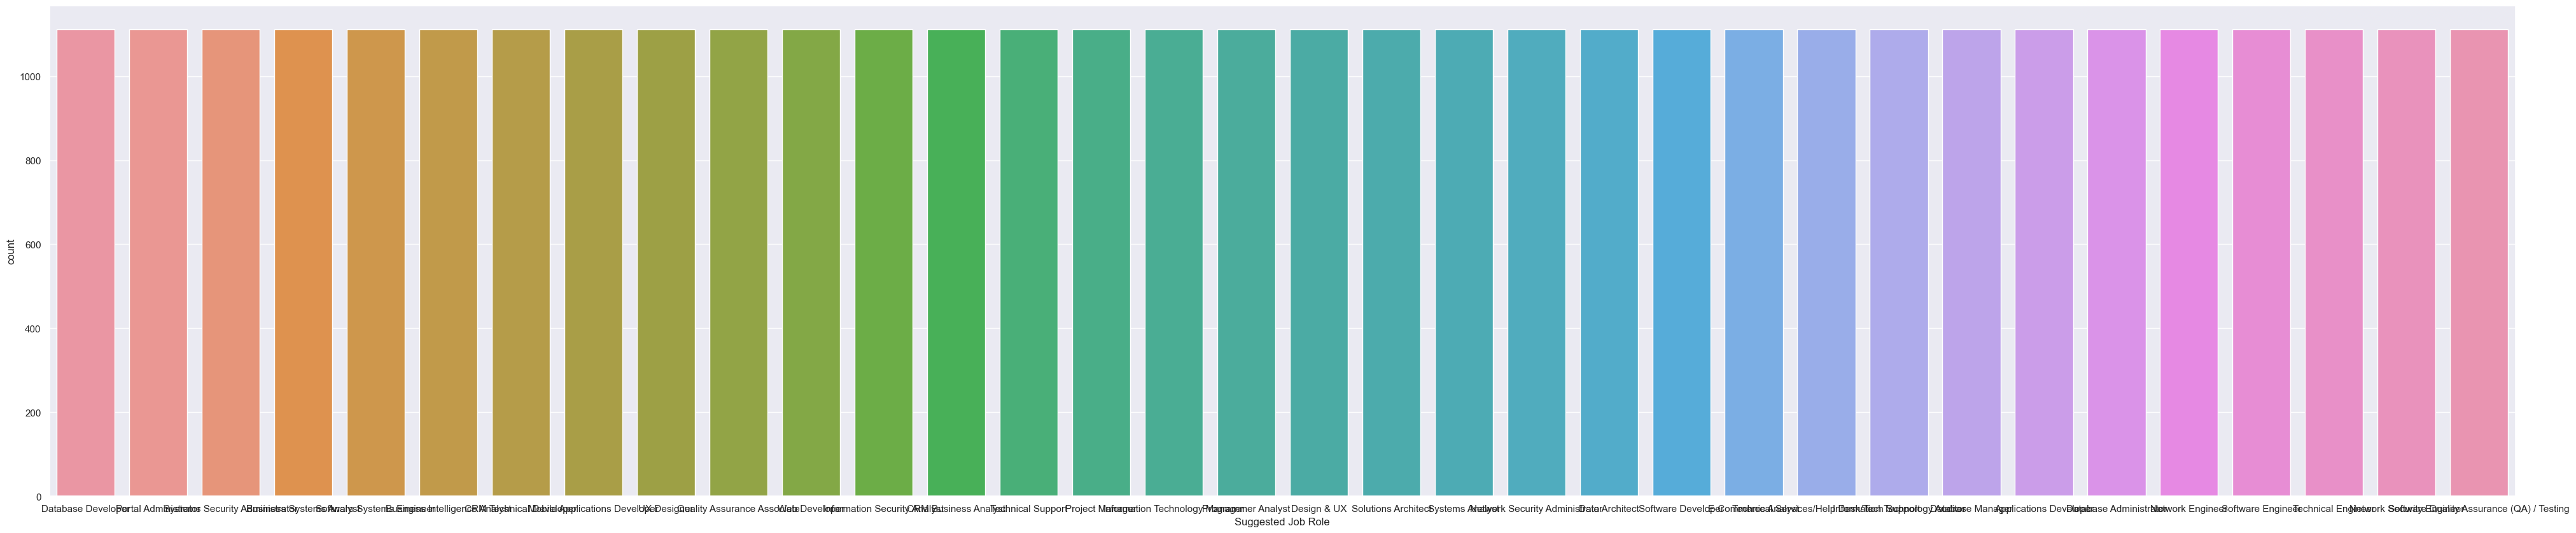

In [98]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df_balanced["Suggested Job Role"])

**(4) Normalizing numeric data**

In [99]:
df_balanced.iloc[:, 0] = df_balanced.iloc[:, 0].div(100)

In [100]:
df_balanced.head()

,Percentage in Communication skills,Hours working per day,Logical Quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,...,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Gentle or Tuff behaviour?,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,0.61,9,4,0,4,8,yes,yes,yes,shell programming,...,Web Services,no,no,Prayer books,stubborn,Management,hard worker,yes,no,Database Developer
1,0.91,12,7,1,2,3,yes,no,yes,machine learning,...,SAaS services,yes,yes,Childrens,gentle,Technical,hard worker,no,yes,Portal Administrator
2,0.94,11,1,4,1,3,yes,no,yes,app development,...,Sales and Marketing,yes,yes,Travel,stubborn,Management,hard worker,no,yes,Portal Administrator
3,0.69,7,1,1,2,5,no,yes,no,python,...,Testing and Maintainance Services,no,no,Romance,gentle,Management,smart worker,yes,yes,Systems Security Administrator
4,0.73,4,5,4,6,3,no,no,no,app development,...,product development,no,yes,Cookbooks,stubborn,Management,hard worker,yes,yes,Business Systems Analyst


In [101]:
dataset = df_balanced.copy()
dataset.head()

,Percentage in Communication skills,Hours working per day,Logical Quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,...,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Gentle or Tuff behaviour?,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,0.61,9,4,0,4,8,yes,yes,yes,shell programming,...,Web Services,no,no,Prayer books,stubborn,Management,hard worker,yes,no,Database Developer
1,0.91,12,7,1,2,3,yes,no,yes,machine learning,...,SAaS services,yes,yes,Childrens,gentle,Technical,hard worker,no,yes,Portal Administrator
2,0.94,11,1,4,1,3,yes,no,yes,app development,...,Sales and Marketing,yes,yes,Travel,stubborn,Management,hard worker,no,yes,Portal Administrator
3,0.69,7,1,1,2,5,no,yes,no,python,...,Testing and Maintainance Services,no,no,Romance,gentle,Management,smart worker,yes,yes,Systems Security Administrator
4,0.73,4,5,4,6,3,no,no,no,app development,...,product development,no,yes,Cookbooks,stubborn,Management,hard worker,yes,yes,Business Systems Analyst


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Percentage in Communication skills   37808 non-null  float64
 1   Hours working per day                37808 non-null  int64  
 2   Logical Quotient rating              37808 non-null  int64  
 3   hackathons                           37808 non-null  int64  
 4   coding skills rating                 37808 non-null  int64  
 5   public speaking points               37808 non-null  int64  
 6   can work long time before system?    37808 non-null  object 
 7   self-learning capability?            37808 non-null  object 
 8   Extra-courses did                    37808 non-null  object 
 9   certifications                       37808 non-null  object 
 10  workshops                            37808 non-null  object 
 11  talenttests taken?          

In [103]:
dataset['Percentage in Communication skills'] = dataset['Percentage in Communication skills'].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Percentage in Communication skills   37808 non-null  float64
 1   Hours working per day                37808 non-null  int64  
 2   Logical Quotient rating              37808 non-null  int64  
 3   hackathons                           37808 non-null  int64  
 4   coding skills rating                 37808 non-null  int64  
 5   public speaking points               37808 non-null  int64  
 6   can work long time before system?    37808 non-null  object 
 7   self-learning capability?            37808 non-null  object 
 8   Extra-courses did                    37808 non-null  object 
 9   certifications                       37808 non-null  object 
 10  workshops                            37808 non-null  object 
 11  talenttests taken?          

# **4. Exploratory Data Analysis**

**(1) Correlation between Numeric Features other than percentage columns**

<Axes: >

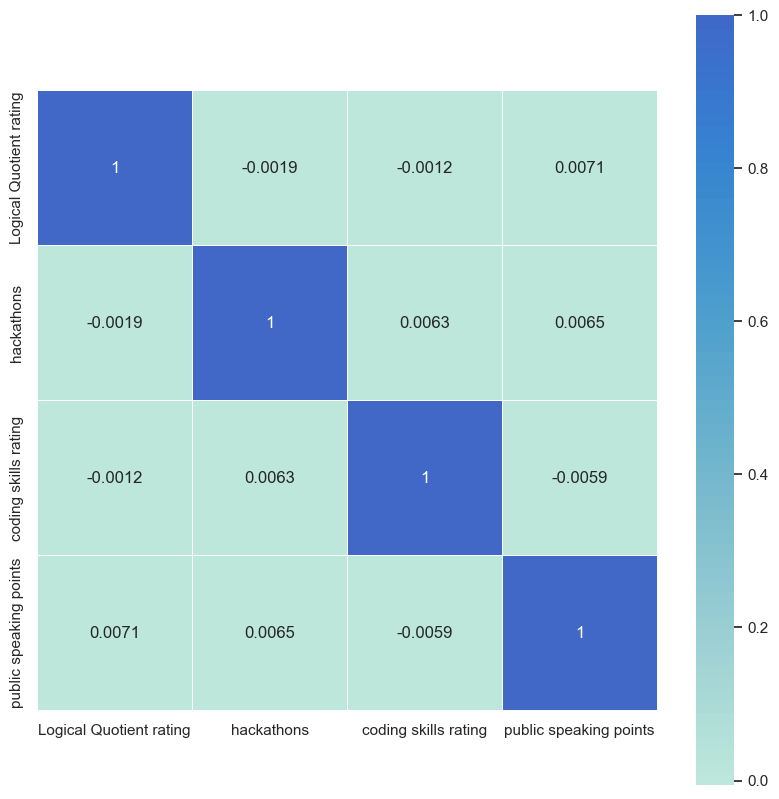

In [104]:
corr = dataset[['Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']].corr()

f, axes = plt.subplots(1,1, figsize=(10, 10)) 
sns.heatmap(corr, square=True, annot=True, linewidth=.4, center=2, ax=axes)

**Observation:** *No highly corelated numerical pair found.*

**(2) Visualization for Categorical Variables**

In [105]:
print(dataset["Interested subjects"].value_counts())

Interested subjects
networks                 4011
IOT                      3879
Computer Architecture    3808
cloud computing          3783
data engineering         3756
programming              3739
parallel computing       3731
hacking                  3730
Management               3701
Software Engineering     3670
Name: count, dtype: int64


<Axes: xlabel='Interested subjects', ylabel='count'>

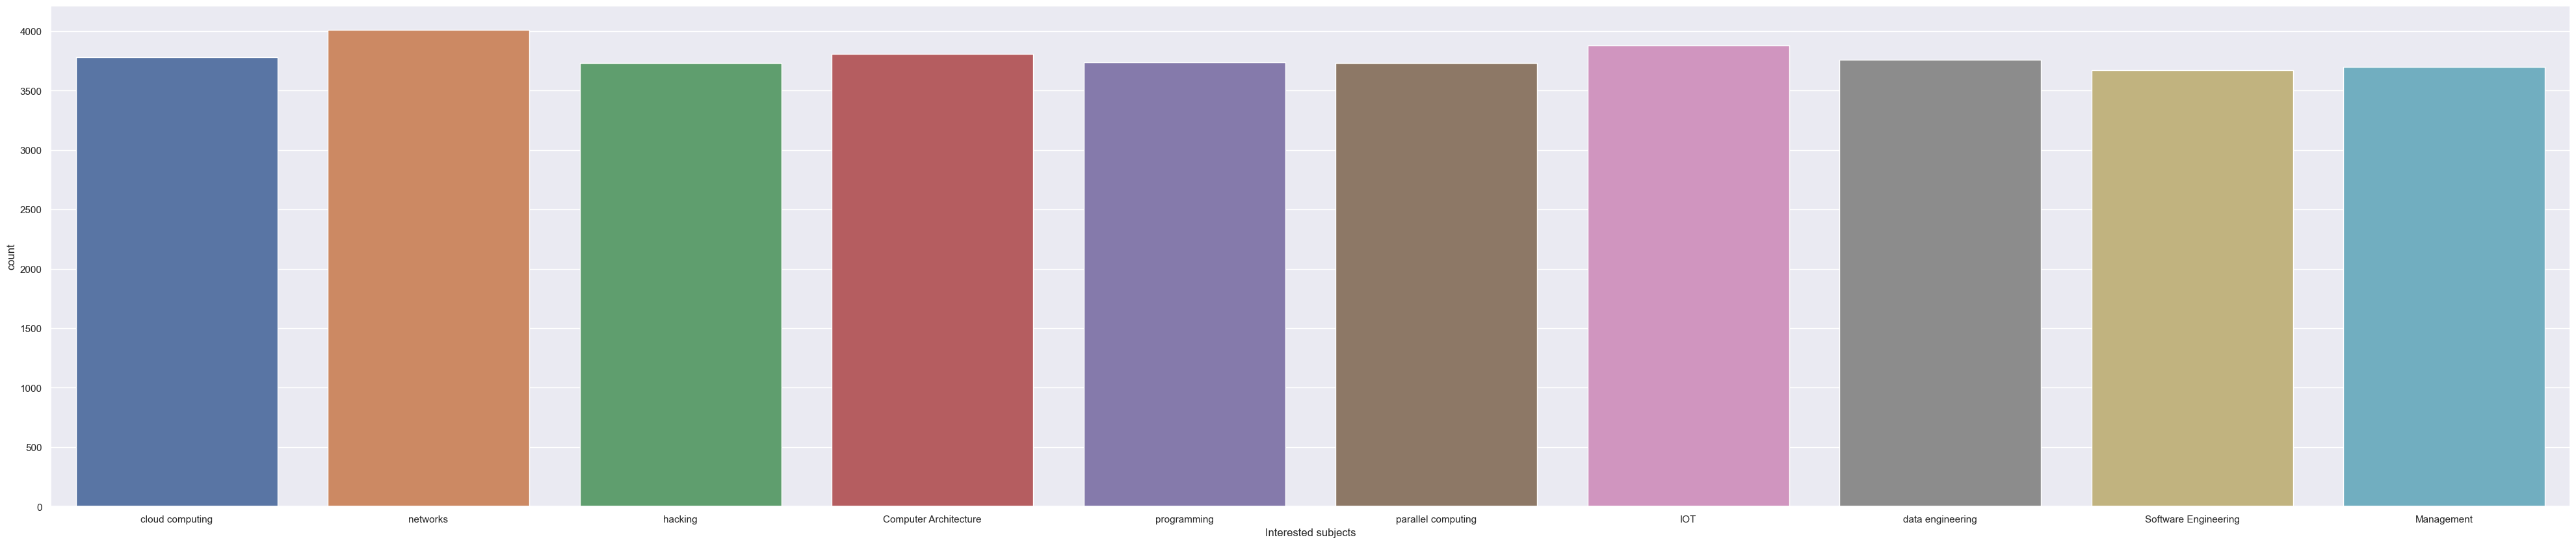

In [106]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Interested subjects"])

<Axes: xlabel='Interested Type of Books', ylabel='count'>

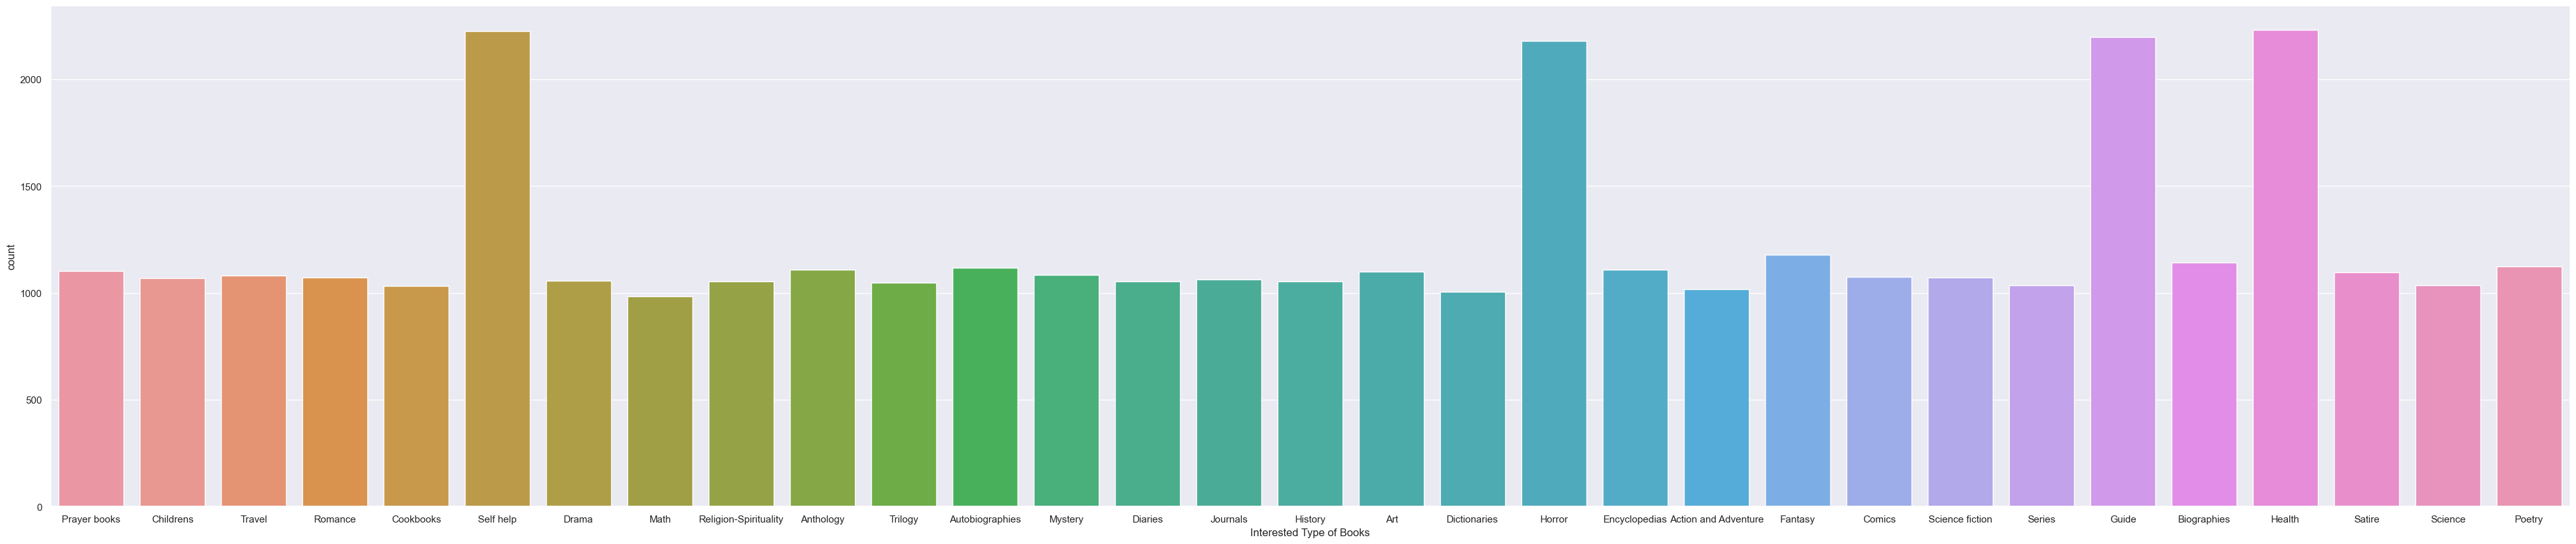

In [107]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Interested Type of Books"])

<Axes: xlabel='certifications', ylabel='count'>

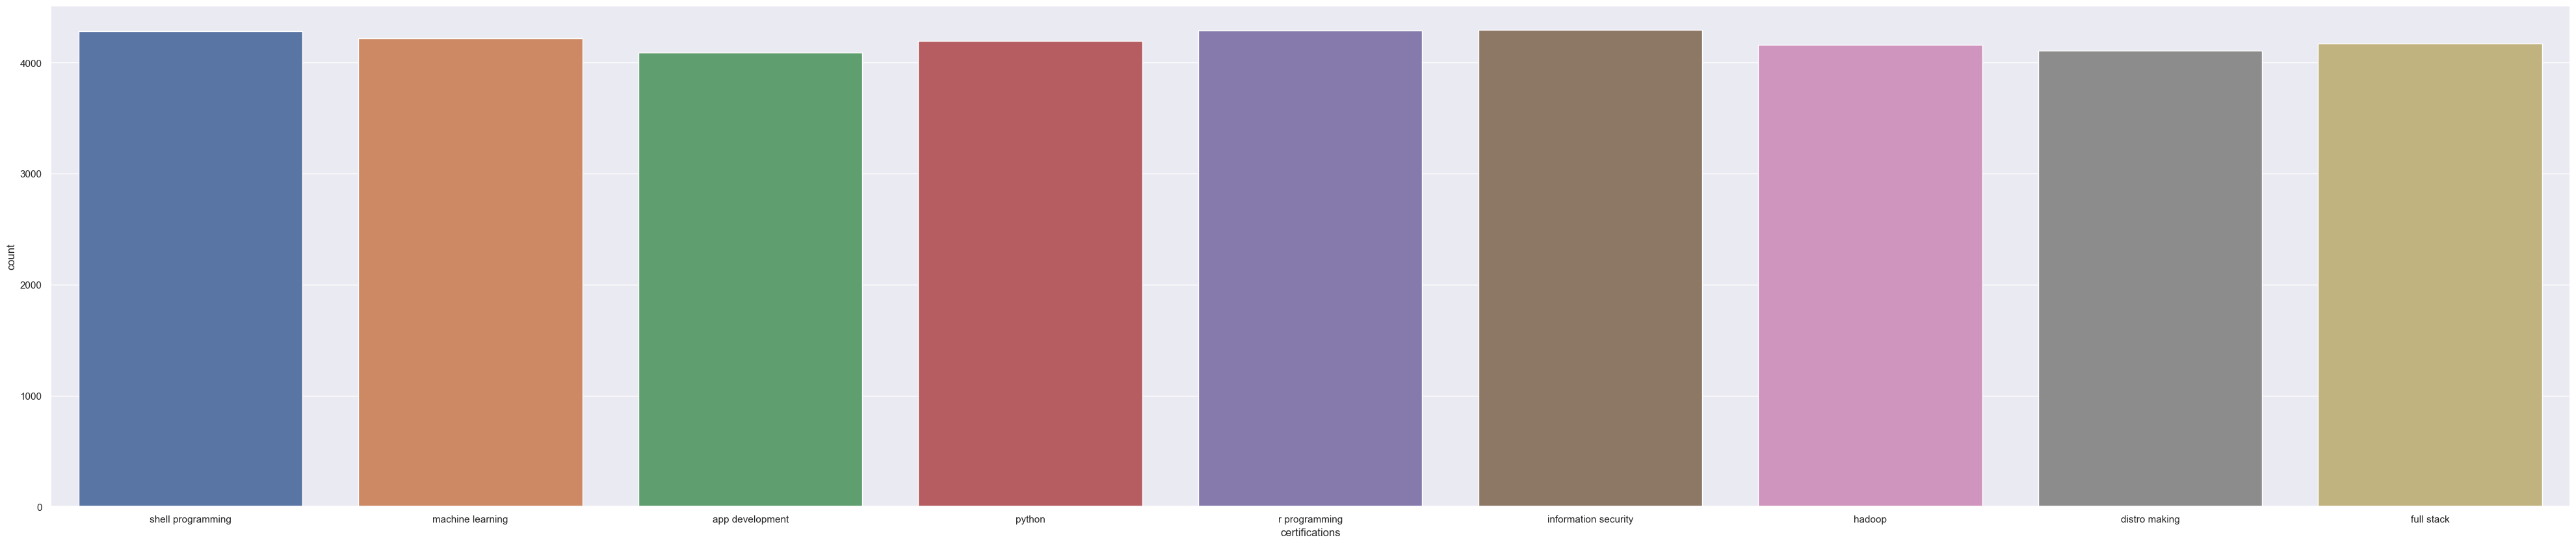

In [108]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["certifications"])

<Axes: xlabel='workshops', ylabel='count'>

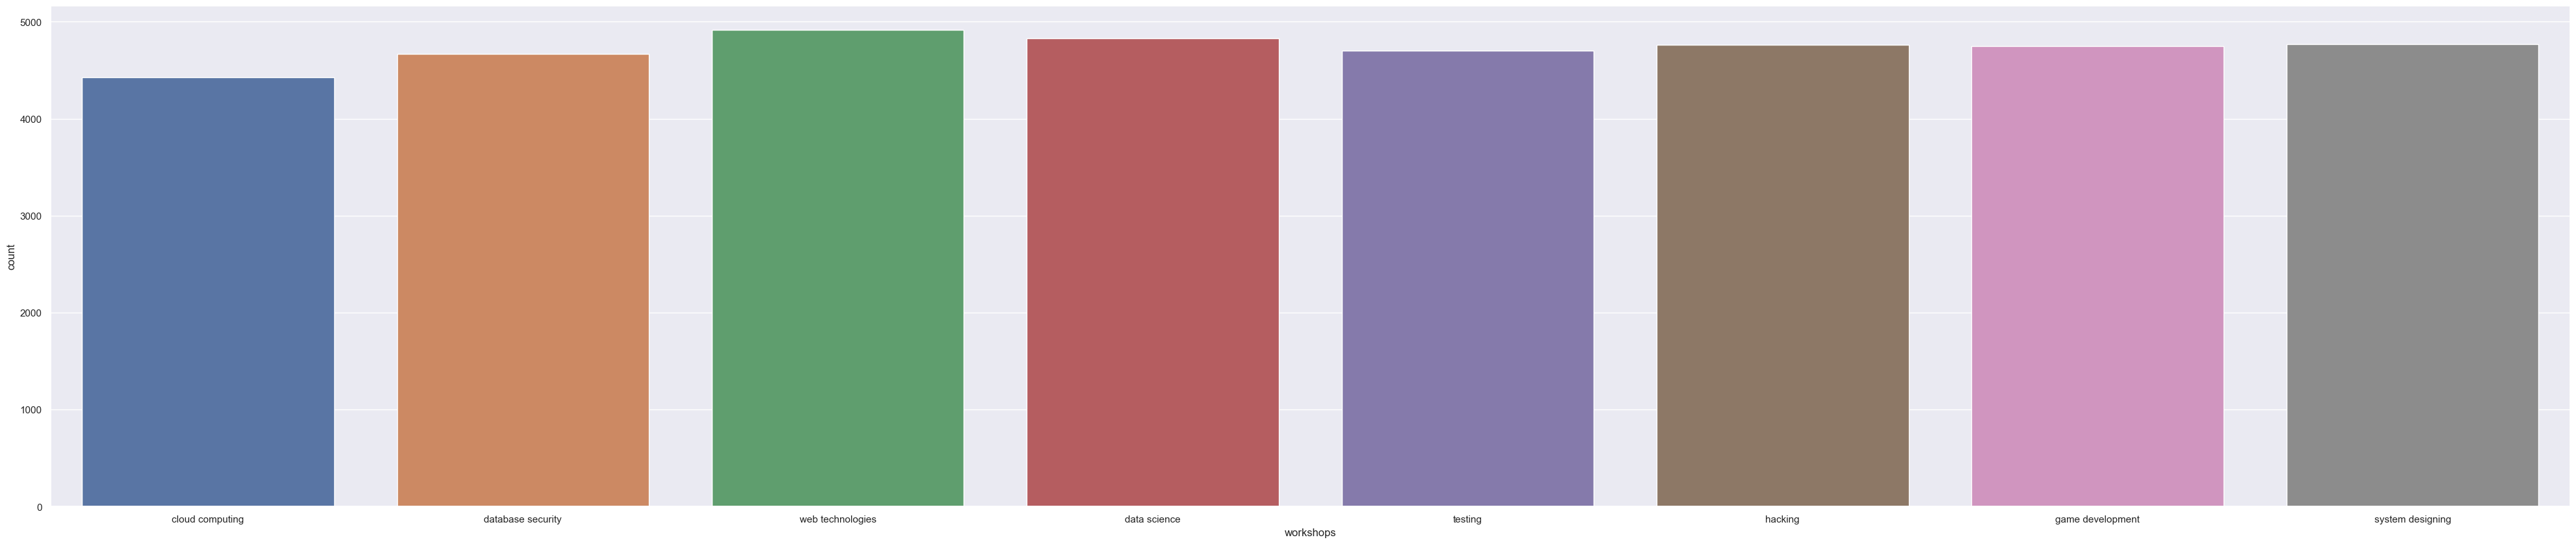

In [109]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["workshops"])

<Axes: xlabel='Type of company want to settle in?', ylabel='count'>

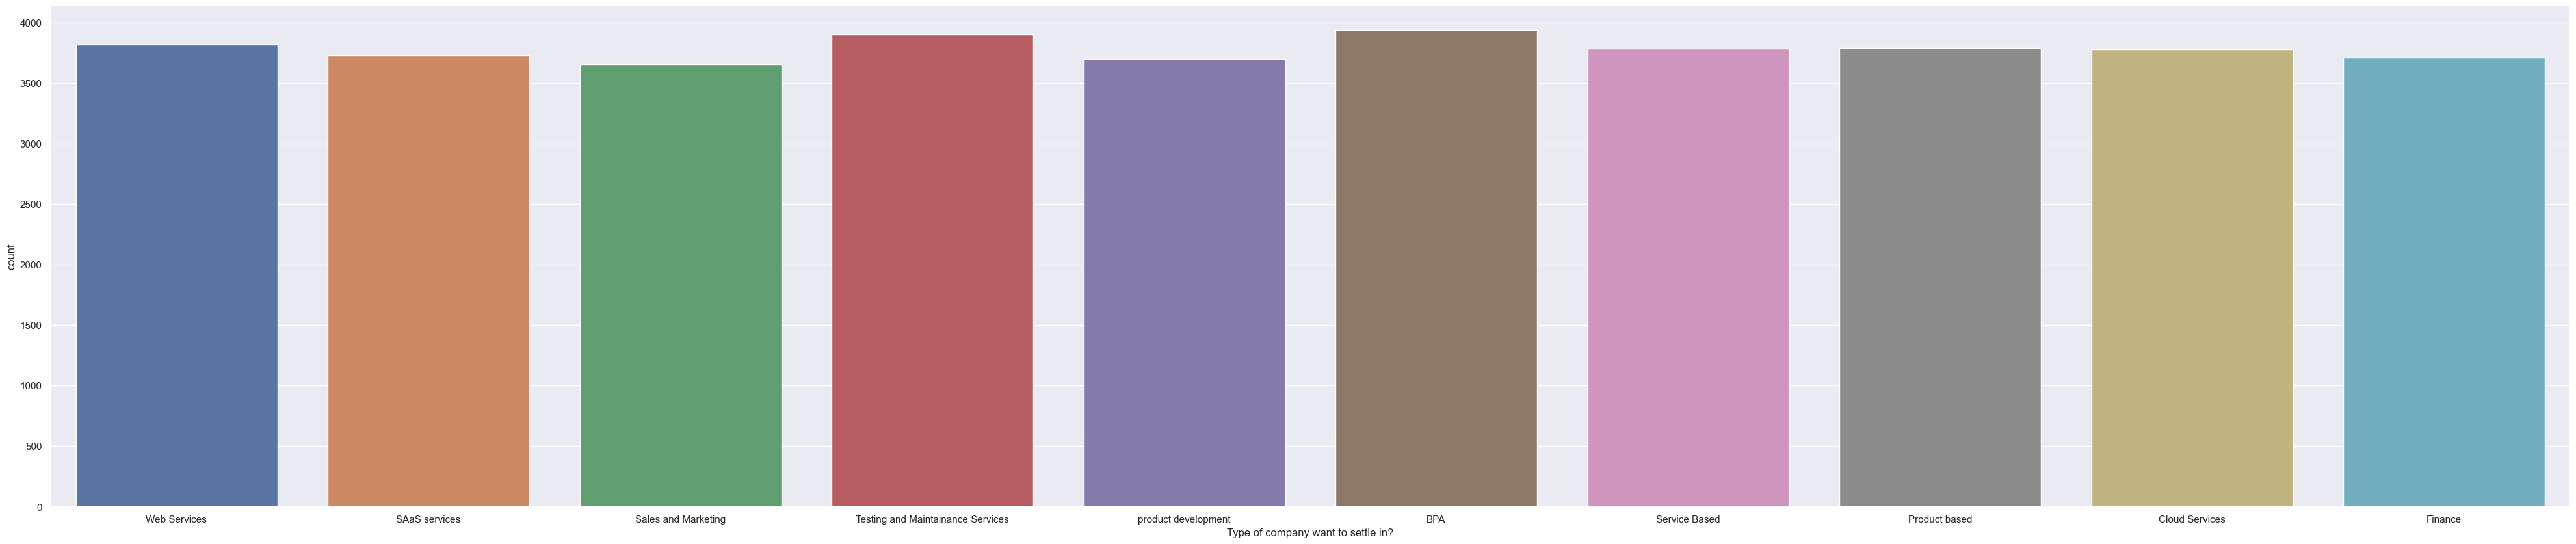

In [110]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["Type of company want to settle in?"])

<Axes: xlabel='interested career area ', ylabel='count'>

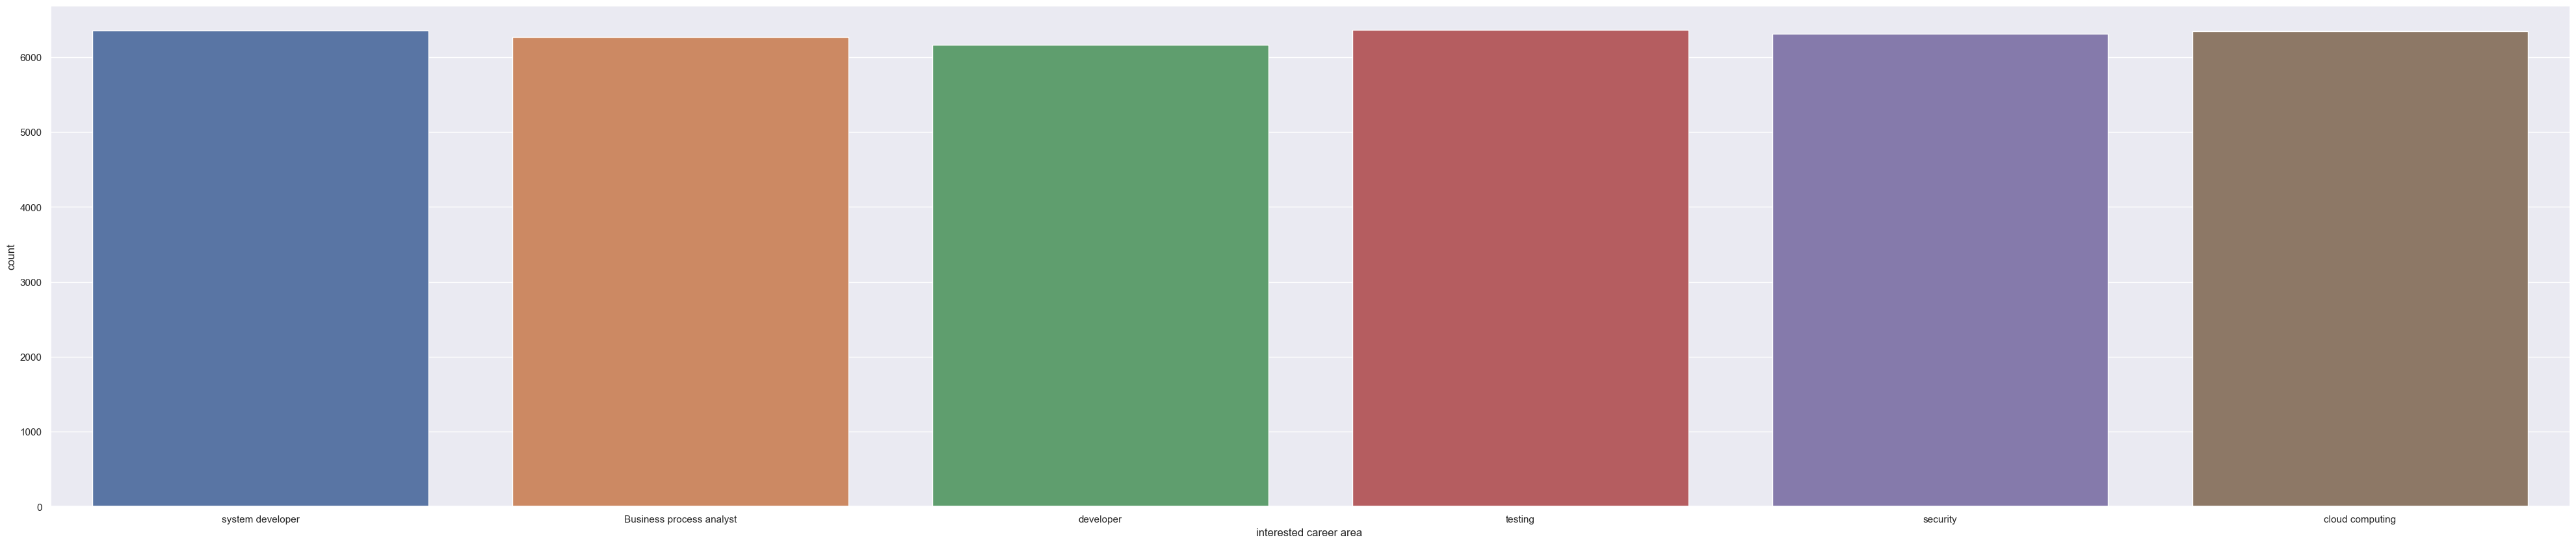

In [111]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = dataset["interested career area "])

# **5. Feature Engineering**

**(1) Binary Encoding for Categorical Variables**

In [112]:
cols = dataset[["can work long time before system?", "self-learning capability?", "Extra-courses did", "talenttests taken?", "olympiads", "Taken inputs from seniors or elders", "interested in games", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    dataset = dataset.replace(cleanup_nums)

In [113]:
print("\n\nList of Categorical features: \n" , dataset.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Job/Higher Studies?', 'Type of company want to settle in?', 'Interested Type of Books', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [114]:
mycol = dataset[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    dataset = dataset.replace(cleanup_nums)

In [115]:
category_cols = dataset[['certifications', 'workshops','Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books']] 
for i in category_cols:
    dataset[i] = dataset[i].astype('category') 
    dataset[i + "_code"] = dataset[i].cat.codes 
    cat_mapping = dict(enumerate(dataset[i].cat.categories)) 
    print(cat_mapping) 
    del dataset[i]

{0: 'app development', 1: 'distro making', 2: 'full stack', 3: 'hadoop', 4: 'information security', 5: 'machine learning', 6: 'python', 7: 'r programming', 8: 'shell programming'}
{0: 'cloud computing', 1: 'data science', 2: 'database security', 3: 'game development', 4: 'hacking', 5: 'system designing', 6: 'testing', 7: 'web technologies'}
{0: 'Computer Architecture', 1: 'IOT', 2: 'Management', 3: 'Software Engineering', 4: 'cloud computing', 5: 'data engineering', 6: 'hacking', 7: 'networks', 8: 'parallel computing', 9: 'programming'}
{0: 'Business process analyst', 1: 'cloud computing', 2: 'developer', 3: 'security', 4: 'system developer', 5: 'testing'}
{0: 'BPA', 1: 'Cloud Services', 2: 'Finance', 3: 'Product based', 4: 'SAaS services', 5: 'Sales and Marketing', 6: 'Service Based', 7: 'Testing and Maintainance Services', 8: 'Web Services', 9: 'product development'}
{0: 'Action and Adventure', 1: 'Anthology', 2: 'Art', 3: 'Autobiographies', 4: 'Biographies', 5: 'Childrens', 6: 'Comi

In [116]:
print("\n\nList of Categorical features: \n" , dataset.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['Job/Higher Studies?', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [117]:
mycol = dataset[["Job/Higher Studies?"]]
for i in mycol:
    cleanup_nums = {i: {"job": 0, "higherstudies": 1}}
    dataset = dataset.replace(cleanup_nums)

mycol = dataset[["Gentle or Tuff behaviour?"]]
for i in mycol:
    cleanup_nums = {i: {"gentle": 0, "stubborn": 1}}
    dataset = dataset.replace(cleanup_nums)

mycol = dataset[["Management or Technical"]]
for i in mycol:
    cleanup_nums = {i: {"Management": 0, "Technical": 1}}
    dataset = dataset.replace(cleanup_nums)

mycol = dataset[["hard/smart worker"]]
for i in mycol:
    cleanup_nums = {i: {"hard worker": 0, "smart worker": 1}}
    dataset = dataset.replace(cleanup_nums)

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Percentage in Communication skills       37808 non-null  float64
 1   Hours working per day                    37808 non-null  int64  
 2   Logical Quotient rating                  37808 non-null  int64  
 3   hackathons                               37808 non-null  int64  
 4   coding skills rating                     37808 non-null  int64  
 5   public speaking points                   37808 non-null  int64  
 6   can work long time before system?        37808 non-null  int64  
 7   self-learning capability?                37808 non-null  int64  
 8   Extra-courses did                        37808 non-null  int64  
 9   talenttests taken?                       37808 non-null  int64  
 10  olympiads                                37808

In [120]:
dataset.head()

,Percentage in Communication skills,Hours working per day,Logical Quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,talenttests taken?,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code
0,0.61,9,4,0,4,8,1,1,1,0,...,0,1,0,Database Developer,8,0,4,4,8,21
1,0.91,12,7,1,2,3,1,0,1,0,...,0,0,1,Portal Administrator,5,2,7,0,4,5
2,0.94,11,1,4,1,3,1,0,1,0,...,0,0,1,Portal Administrator,0,7,6,2,5,29
3,0.69,7,1,1,2,5,0,1,0,1,...,1,1,1,Systems Security Administrator,6,1,7,5,7,23
4,0.73,4,5,4,6,3,0,0,0,0,...,0,1,1,Business Systems Analyst,0,0,0,5,9,7


In [121]:
print("List of Numerical features: \n" , dataset.select_dtypes(include=np.number).columns.tolist())

List of Numerical features: 
 ['Percentage in Communication skills', 'Hours working per day', 'Logical Quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'can work long time before system?', 'self-learning capability?', 'Extra-courses did', 'talenttests taken?', 'olympiads', 'reading and writing skills', 'memory capability score', 'Job/Higher Studies?', 'Taken inputs from seniors or elders', 'interested in games', 'Gentle or Tuff behaviour?', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'certifications_code', 'workshops_code', 'Interested subjects_code', 'interested career area _code', 'Type of company want to settle in?_code', 'Interested Type of Books_code']


In [122]:
dataset.to_csv('final.csv', index=False)

# **6. Building Machine Learning Model**

In [123]:
dataset.head()

,Percentage in Communication skills,Hours working per day,Logical Quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,talenttests taken?,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code
0,0.61,9,4,0,4,8,1,1,1,0,...,0,1,0,Database Developer,8,0,4,4,8,21
1,0.91,12,7,1,2,3,1,0,1,0,...,0,0,1,Portal Administrator,5,2,7,0,4,5
2,0.94,11,1,4,1,3,1,0,1,0,...,0,0,1,Portal Administrator,0,7,6,2,5,29
3,0.69,7,1,1,2,5,0,1,0,1,...,1,1,1,Systems Security Administrator,6,1,7,5,7,23
4,0.73,4,5,4,6,3,0,0,0,0,...,0,1,1,Business Systems Analyst,0,0,0,5,9,7


In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37808 entries, 0 to 37807
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Percentage in Communication skills       37808 non-null  float64
 1   Hours working per day                    37808 non-null  int64  
 2   Logical Quotient rating                  37808 non-null  int64  
 3   hackathons                               37808 non-null  int64  
 4   coding skills rating                     37808 non-null  int64  
 5   public speaking points                   37808 non-null  int64  
 6   can work long time before system?        37808 non-null  int64  
 7   self-learning capability?                37808 non-null  int64  
 8   Extra-courses did                        37808 non-null  int64  
 9   talenttests taken?                       37808 non-null  int64  
 10  olympiads                                37808

In [125]:
df_train_x = dataset.drop('Suggested Job Role', axis=1) 
df_train_y = dataset['Suggested Job Role']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.2, random_state=41)

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

**Decision Tree Classifier**

In [127]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [128]:
y_pred

array(['Information Security Analyst', 'Quality Assurance Associate',
       'CRM Business Analyst', ..., 'Network Security Engineer',
       'Network Security Engineer', 'Portal Administrator'], dtype=object)

In [129]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [130]:
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*100)

confusion matrics= [[161   1   1 ...   1   2   4]
 [  3 161   0 ...   0   2   0]
 [  3   0 164 ...   3   1   0]
 ...
 [  1   2   7 ... 157   2   4]
 [  2   2   0 ...   5 141   1]
 [  1   2   1 ...   2   4 185]]
  
accuracy= 70.37820682359164


In [131]:
cm[0]

array([161,   1,   1,   2,   0,   0,   4,   1,   0,   2,   1,   1,   2,
         2,   6,   2,   2,   3,   0,   2,   0,   0,   0,   0,   1,   1,
         0,   2,   2,   1,   0,   1,   2,   4], dtype=int64)

In [46]:
import pickle
filename = 'decision_tree_model.pkl'
pickle.dump(dtree, open(filename, 'wb'))


In [48]:
pred = dtree.predict([[0.61, 9, 4, 0, 4, 8, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 8, 0, 4, 4, 8, 21]])
pred

c:\Users\ADITYA\AppData\Local\Programs\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Database Developer'], dtype=object)

In [52]:
with open('decision_tree_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [53]:
print(model.predict([[0.69, 0.63, 0.78, 0.87, 0.94, 0.94, 0.87, 0.84, 0.61, 9, 4, 0, 4, 8, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 8, 0, 4, 4, 8, 21, 1, 0, 0, 1, 1, 0, 1, 0]]))

['Database Developer']


c:\Users\ADITYA\AppData\Local\Programs\Python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
